In [1]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color: pink; padding: 10px"><strong>
Look at our task, determine what's our next step:<br>

@the goal of this project is to analyze student test performance<br>
@pick any school in this dataset as an initial comparison point<br>
@pick a feature/measure/score<br>
@compare above school to schools in the entire dataset, schools in a particular borough, or schools in a particular district - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)<br>
@the analysis should include some descriptive statistics<br>
@the analysis should include one cleaning task (or more)<br>
@the analysis should include one visualization (or more)<br>
@the analysis should include a brief conclusion statement (not more than two or three sentences
    
</div>

<H1>Data Exploration and Upload

In [2]:
#import dataset
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
#look at the data
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [4]:
#look at shape of the data 
df.shape

#212,331 rows and 15 columns

(212331, 15)

In [5]:
#Display info about the dataframe like how many columns and what data type
df.info()

#most of column not numeric data, can't work with df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [6]:
#Display school levels

df["School Level"].unique()

#Including students from elementary, K-8 to High School K-12

array(['K-8', 'High school', 'Junior High-Intermediate-Middle',
       'Secondary School', 'K-12 all grades', 'Elementary'], dtype=object)

In [7]:
#Display Regent Exam, including 14 subjects

df["Regents Exam"].unique()

array(['Common Core Algebra', 'Living Environment', 'Common Core English',
       'Algebra2/Trigonometry', 'Common Core Algebra2',
       'Common Core Geometry', 'English', 'Geometry',
       'Global History and Geography', 'Integrated Algebra',
       'Physical Settings/Chemistry', 'Physical Settings/Earth Science',
       'U.S. History and Government', 'Physical Settings/Physics', nan],
      dtype=object)

In [8]:
#Display all school names
df["School Name"].unique()

#too many schools can't show all

array(['P.S. 034 Franklin D. Roosevelt', 'P.S. 140 Nathan Straus',
       'P.S. 184m Shuang Wen', ..., 'Family Life Academy Charter School',
       'Harriet Tubman Charter School', 'Icahn Charter School'],
      dtype=object)

In [9]:
#1,012 schools in total
df["School Name"].nunique()

1012

In [10]:
df["Year"].unique()

#from year 2015-2017

array([2017, 2015, 2016])

<div style="background-color: pink; padding: 10px">

**Now we know:<br>**
1.  This data reflects the scores of students taking high-school level Regents exams in NYC<br>
2.  Students take the exam from elementary to high school<br>
3.  Grades for each of category of Regents were taken over the years 2015-2017<br>
4.  Regent Exam include 14 subjects<br>
5.  Includes 1,012 schools score data
</div>

<div style="background-color: pink; padding: 10px">

**Still need to know:**
1. What does 's' mean?
2. What does 'CR' mean?
</div>

<H1>Search more info

<div style="background-color: #f2f2f2; padding: 10px">

**Data Source**

This data can be found on NYC OpenData, it's provided by NYC Department of Education.

->2014-15 To 2016-17 School- Level NYC Regents Report For All Variables report: (https://data.cityofnewyork.us/Education/2014-15-To-2016-17-School-Level-NYC-Regents-Report/csps-2ne9)

**DATA DESCRIPTION:**

This data reflects the scores of students taking high-school level Regents exams.


**Data Dictionary:**

The following information can be found at: https://data.cityofnewyork.us/api/views/csps-2ne9/files/3db3f2bd-d8d4-4ab2-b746-42fc56118066?download=true&filename=2014-15_To_2016-17_School_Level_NYC_Regents_Report_For_All_Variables.xlsx

1) Testing and score data includes all administrations of the Regents exam: January, June, and August. It reports the highest score for each student for each Regents exam for each school year. Non-numeric marks are dropped from the data.

2) Due to ongoing updates to the data, including late uploads of Regents scores from prior test administrations, the numbers reported will likely change in subsequent years' reports.

3) School DBNs are as of June 30th for each school year.
<div style="background-color: yellow; padding: 10px">
4) Pursuant to the legislation and in accordance with the Family Educational Rights and Privacy Act (FERPA), rows with 5 or fewer students have been replaced with an "s". In addition, other rows have been replaced with an "s" when they could reveal, through addition or subtraction, the underlying numbers that have been redacted.

5) CR: College & career readiness scores only apply to ELA and Math exams. The CR benchmarks on Regents exams include: - English Regents exam score of 75+ - Any Math Regents exam score of 80+ - Common Core-aligned Algebra I or Geometry Regents exam score of 70+ or Algebra II/Trigonometry exam score of 65+
</div>
6) Students with disabilities are defined as any child receiving an IEP as of the end of the school year.

7) Data on students with disabilities and English language learners are as of June 30th for each school year.

8) Multiple Race Categories Not Represented columns includes students who do not report their race, as well as students reported as Native American or Multi-Racial.
</div>

<H1>Data Cleaning

In [11]:
#count missing data by column

df.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

<div style="background-color: orange; padding: 10px"><strong>
There're many 'na' didn't count as missing data.<br>
Let's try isna() function
</div></strong>

In [12]:
# Count 'na' in each column
df.isna().sum()


School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

<div style="background-color: orange; padding: 10px"><strong>
Still not working, why???<br>
Try another way...
</div></strong>    

In [13]:
#Total occurrences of 'na' in the DataFrame:
#set up variable

na_count = (df == 'na').sum()
na_count

#142,680 'na' in 2 columns

School DBN                          0
School Name                         0
School Level                        0
Regents Exam                        0
Year                                0
Total Tested                        0
Mean Score                          0
Number Scoring Below 65             0
Percent Scoring Below 65            0
Number Scoring 65 or Above          0
Percent Scoring 65 or Above         0
Number Scoring 80 or Above          0
Percent Scoring 80 or Above         0
Number Scoring CR              142680
Percent Scoring CR             142680
dtype: int64

In [14]:
##Total occurrences of 's' in the DataFrame:

s_count = (df == 's').sum()
s_count

School DBN                         0
School Name                        0
School Level                       0
Regents Exam                       0
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65        75222
Percent Scoring Below 65       75222
Number Scoring 65 or Above     75222
Percent Scoring 65 or Above    75222
Number Scoring 80 or Above     75222
Percent Scoring 80 or Above    75222
Number Scoring CR                  0
Percent Scoring CR                 0
dtype: int64

<div style="background-color: orange; padding: 10px"><strong>
There're too many missing data on 'Number Scoring CR' and 'Percent Scoring CR' columns, and we don't need them, that'll be better to drop them
</div></strong>

In [15]:
#drop columns
df.drop(['Number Scoring CR', 'Percent Scoring CR'], axis=1, inplace = True)


In [16]:
#check dataset now
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s


In [17]:
#drops all missing values
df.dropna()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s


In [18]:
#to see the shape of the data now
df.shape

(212331, 13)

In [19]:
# drop duplicate data

#df2 = df.drop_duplicates()
#df2.shape == df.shape

#there are many duplicate rows in df
#however, check df2. it seems not like duplicate rows, try not to delete them first

In [20]:
#df2

In [21]:
#duplicate_rows = df[df.duplicated()]
#duplicate_rows

In [22]:
#Re-assign object classified columns as numeric

columns_to_convert = ['Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
                      'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
                      'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#errors='coerce':

#Display the DataFrame after re-assigning the columns as numeric
df.dtypes


School DBN                      object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65        float64
Percent Scoring Below 65       float64
Number Scoring 65 or Above     float64
Percent Scoring 65 or Above    float64
Number Scoring 80 or Above     float64
Percent Scoring 80 or Above    float64
dtype: object

In [23]:
#nan_columns = df.isna().any()

#print(df)
#print("\nNaN Variables:")
#print(nan_columns)

In [24]:
#columns_with_null = df.columns[df.isnull().any()]

# Create a heatmap of NaN values only for columns with null values
#plt.figure(figsize=(8, 5))
#sns.heatmap(df[columns_with_null].isnull(), cmap='viridis', cbar=False, yticklabels=False)

#plt.title('NaN Values in DataFrame (Columns with Null Values)')
#plt.show()

In [25]:
#Describe the numeric data by the five point summary
df.describe().round(2)

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
count,212331.00,212331.00,137109.00,137109.00,137109.00,137109.00,137109.00,137109.00,137109.00
mean,2015.96,49.36,66.00,25.14,41.93,46.44,58.07,20.51,22.69
std,0.80,93.02,11.29,37.16,28.41,85.19,28.41,56.30,26.16
min,2015.00,1.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015.00,5.00,58.30,5.00,17.50,8.00,36.00,1.00,2.20
50%,2016.00,20.00,65.40,13.00,40.20,21.00,59.80,5.00,12.50
75%,2017.00,57.00,73.40,31.00,64.00,52.00,82.50,18.00,34.50
max,2017.00,1729.00,98.70,697.00,100.00,1607.00,100.00,1365.00,100.00


<div style="background-color: Pink; padding: 10px"><strong>
There're 142,680 missing values of Percent Scoring CR and Percent Scoring CR columns, we cleaned data by dropping missing data and delete the two columns we don't need.<br>

Also, we convert some object classified columns as numeric, then we can calculate students scores.
</div>


<H1>Initial Analysis of Regents Data

<div style="background-color: orange; padding: 10px"><strong>
First of all, decide which school to pick as an initial comparison point
</div>

In [26]:
#how many schools are in each school level 
#using groupby
#.nunique() calculates the count of unique school names for each school level.

school_count_per_level = df.groupby('School Level')['School Name'].nunique().sort_values(ascending = False)
school_count_per_level

School Level
High school                        457
Junior High-Intermediate-Middle    263
K-8                                161
Secondary School                    95
K-12 all grades                     33
Elementary                           3
Name: School Name, dtype: int64

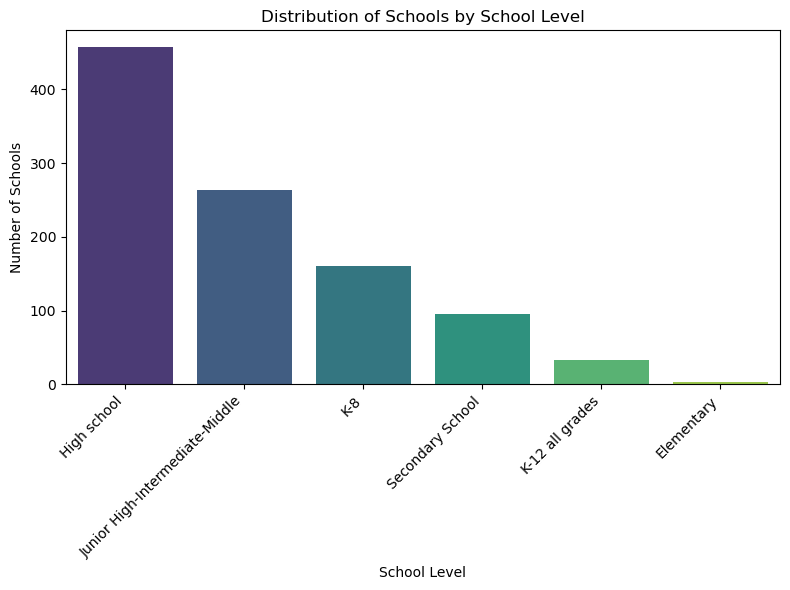

In [27]:
#Create a bar chart to visualize the distribution of schools by school level

plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x=school_count_per_level.index, y=school_count_per_level.values, palette="viridis")

#Set x-axis data to the school levels
#set y-axis data to the number of schools for each school level. 
#sets the color palette "viridis" for the bars.(else: deep, muted, pastel, dark...)

# Set labels and title
plt.xlabel('School Level')
plt.ylabel('Number of Schools')
plt.title('Distribution of Schools by School Level')

#rotates the x-axis tick labels by 45 degrees and aligns them to the right to avoid overlapping.
plt.xticks(rotation=45, ha='right') 


plt.tight_layout()

# Show the plot
plt.show()

In [28]:
#the number of Regents exams taken in each subject

exams_per_subject = df['Regents Exam'].value_counts()
exams_per_subject

Common Core Algebra                29254
Living Environment                 25539
U.S. History and Government        20426
Common Core English                19878
Global History and Geography       19192
Physical Settings/Earth Science    15971
Common Core Geometry               15267
Physical Settings/Chemistry        11670
English                            11091
Integrated Algebra                 11022
Algebra2/Trigonometry              10788
Geometry                            8509
Common Core Algebra2                7915
Physical Settings/Physics           5799
Name: Regents Exam, dtype: int64

<div style="background-color: Pink; padding: 10px"><strong>
The presence of students from various school levels, including high school, junior high, K-8, secondary school, K-12 all grades, and elementary, taking Regents exams indicates that the exams are designed to assess students' proficiency and preparedness at different educational stages.<br>

Students may take Regents exams based on their academic proficiency and progress in specific subjects. Advanced students may take Regents exams earlier, while others may take them at a later stage in their education. <br>   

The most taken regents exam was Common Core Algebra and Living environmantal, and the least taken were Physical Settings/Physics and Common Core Algebra2.<br>

The number of students taking each exam could be influenced by various factors, including graduation requirements, students' subject preferences or students pursuing particular college majors or career paths etc.
</div>

<div style="background-color: orange; padding: 10px"><strong>
What's the difference between :<br>
.nunique()<br>
.value_counts()<br>-->counts the occurrences of each unique value <br>
.count()<br>-->gives the count of non-missing values
    
</div>

In [74]:
#the total number of regents exams taken per year
exams_per_year = df.groupby('Year')['Regents Exam'].count()
exams_per_year

#df.Year.value_counts(sort = True, dropna = False, normalize = False)

Year
2015    72758
2016    76123
2017    63440
Name: Regents Exam, dtype: int64

In [30]:
#the data of Common Core Algebra exams taken

common_core_algebra_exams = df[df['Regents Exam'] == 'Common Core Algebra']
common_core_algebra_exams


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212319,84X717,Icahn Charter School,K-8,Common Core Algebra,2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212320,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9,0.0,0.0,8.0,100.0,7.0,87.5
212321,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0.0,0.0,6.0,100.0,6.0,100.0
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87.0,0.0,0.0,6.0,100.0,6.0,100.0


In [31]:
#How many Common Core Algebra exam taken per year
common_core_algebra_year = common_core_algebra_exams.groupby('Year')['School DBN'].count()
common_core_algebra_year

Year
2015     9126
2016     9804
2017    10324
Name: School DBN, dtype: int64

In [32]:
#add one more column to know boruogh of schools

df['Borough'] = df['School DBN'].str[2] #extracts the 2nd character of School DBN

#create a dictionary
borough_mapping = {
    "M": "Manhattan",
    "X": "Bronx",
    "K": "Brooklyn",
    "Q": "Queens",
    "R": "Staten Island"
}

df['Borough'] = df['Borough'].map(borough_mapping)

#map can apply a function to each element of a list
#.map() funtion create iterator
#extracted borough codes to their corresponding full names using the borough_mapping dictionary. 
#.map() function returns a map object of the results

In [33]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Borough
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,Manhattan
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,Manhattan
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx


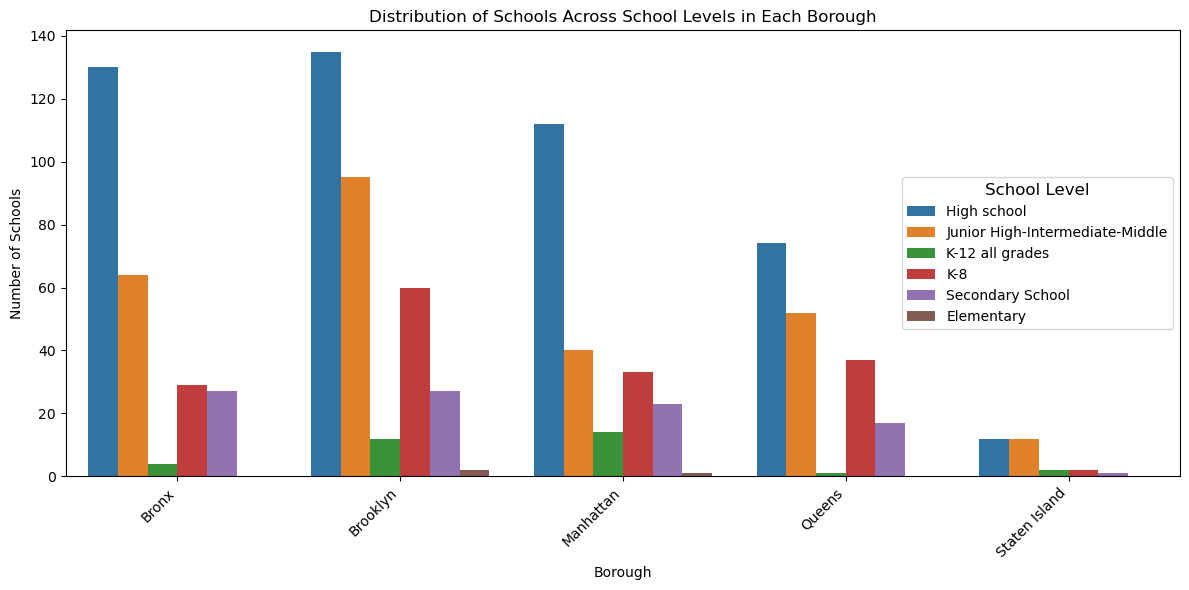

In [34]:
#distribution of Schools Across School Levels in Each Borough

school_count_per_level_borough = df.groupby(['Borough', 'School Level'])['School DBN'].nunique().reset_index()

#.reset_index() used after the groupby operation
#now ny index column is Borough
#to convert the index-based groupby result back to a regular DataFrame
#new integer index is assigned

plt.figure(figsize=(12, 6))
sns.barplot(x='Borough', y='School DBN', hue='School Level', data=school_count_per_level_borough)

plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.title('Distribution of Schools Across School Levels in Each Borough')

plt.legend(title='School Level', title_fontsize='12', loc='center right')
#legend overlapping on bars, loc='center right' adjust position

plt.xticks(rotation=45, ha='right')

#automatically adjusts the subplot parameters for a tight layout.
plt.tight_layout()


plt.show()

In [35]:
#filter high schools taken 'Common Core Algebra' exams
high_school_com_algebra = df[(df['School Level'] == 'High school') & (df['Regents Exam'] == 'Common Core Algebra')]
high_school_com_algebra

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Borough
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11.0,91.7,1.0,8.3,0.0,0.0,Manhattan
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25.0,50.0,25.0,50.0,3.0,6.0,Manhattan
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15.0,28.3,38.0,71.7,6.0,11.3,Manhattan
62,01M448,University Neighborhood High School,High school,Common Core Algebra,2015,105,62.6,52.0,49.5,53.0,50.5,2.0,1.9,Manhattan
63,01M448,University Neighborhood High School,High school,Common Core Algebra,2016,148,68.2,42.0,28.4,106.0,71.6,19.0,12.8,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211989,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2017,146,66.3,48.0,32.9,98.0,67.1,7.0,4.8,Bronx
211990,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
211991,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212096,84X581,South Bronx Community Charter School,High school,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx


In [36]:
#how many high schools taken 'Common Core Algebra' exam by year
high_school_com_algebra_year =  high_school_com_algebra.groupby('Year')['School DBN'].count()
high_school_com_algebra_year

Year
2015    4920
2016    5294
2017    5238
Name: School DBN, dtype: int64

<div style="background-color: orange; padding: 10px"><strong>
The most high schools taken 'Common Core Algebra' exam is 2016, let's focus on 2016
</div>

In [37]:
high_school_com_algebra_2016= high_school_com_algebra[high_school_com_algebra['Year'] == 2016]

In [38]:
#how many high school students join the regent exam of 'Common Core Algebra' in 2016
high_school_com_algebra_2016['Total Tested'].sum()

413650

In [39]:
#how many high school students join the regent exam of 'Common Core Algebra' in 2016 in each borough

high_school_com_algebra_2016.groupby('Borough')['Total Tested'].sum().sort_values(ascending = False)

Borough
Brooklyn         117340
Queens           112000
Bronx             83935
Manhattan         75385
Staten Island     24990
Name: Total Tested, dtype: int64

<div style="background-color: pink; padding: 10px"><strong>
Now we know:<br>
1. The most school level in the dataset is High School<br>
2. The most taken subject of Regents exam is Common Core Algebra, and the most taken year is 2016 in High School.<br>
3. Brooklyn has the most high schools in 5 boroughs<br>
4. 413,650 high school students join the regent exam of 'Common Core Algebra' in 2016
</div>

<H1>Assignment Questions & Analysis

<div style="background-color: orange; padding: 10px"><strong>
Depending on research above and my own life experience, I would like to pick a High School in Brooklyn around my neighbor which calls "Bedford Academy High School"
</div>

In [40]:
#Pick one individual school and compare results from that school to all other schools.

bahs = high_school_com_algebra[(high_school_com_algebra['School Name'] == 'Bedford Academy High School')]
bahs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Borough
8772,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,73,75.3,2.0,2.7,71.0,97.3,15.0,20.5,Brooklyn
8773,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,63,77.5,3.0,4.8,60.0,95.2,28.0,44.4,Brooklyn
8774,13K595,Bedford Academy High School,High school,Common Core Algebra,2017,54,80.4,1.0,1.9,53.0,98.1,35.0,64.8,Brooklyn
35267,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
35268,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
35269,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,49,78.8,1.0,2.0,48.0,98.0,28.0,57.1,Brooklyn
35270,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,14,72.9,2.0,14.3,12.0,85.7,0.0,0.0,Brooklyn
35271,13K595,Bedford Academy High School,High school,Common Core Algebra,2017,45,81.5,0.0,0.0,45.0,100.0,32.0,71.1,Brooklyn
35272,13K595,Bedford Academy High School,High school,Common Core Algebra,2017,9,74.7,1.0,11.1,8.0,88.9,3.0,33.3,Brooklyn
76681,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn


In [41]:
#the score of 'Bedford Academy High School' for "Common Core Algebra" in 2016

bahs_year_2016 = bahs[bahs['Year'] == 2016]

# Group by 'Year' and calculate the mean for each group, then round to 2 decimal places
bahs_year_mean_2016 = bahs_year_2016.groupby('Year').mean().round(2)
bahs_filtered = bahs_year_mean_2016[['Total Tested', 'Mean Score', 'Percent Scoring Below 65', 
                                     'Percent Scoring 65 or Above', 'Percent Scoring 80 or Above']]
bahs_filtered

,Total Tested,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above
Year,,,,,
2016,26.25,77.51,4.79,95.21,42.27


In [42]:
bahs_year_2016

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Borough
8773,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,63,77.5,3.0,4.8,60.0,95.2,28.0,44.4,Brooklyn
35269,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,49,78.8,1.0,2.0,48.0,98.0,28.0,57.1,Brooklyn
35270,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,14,72.9,2.0,14.3,12.0,85.7,0.0,0.0,Brooklyn
76683,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
76684,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
119550,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,26,79.0,0.0,0.0,26.0,100.0,12.0,46.2,Brooklyn
119551,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,37,76.5,3.0,8.1,34.0,91.9,16.0,43.2,Brooklyn
172585,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
172586,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,47,76.6,2.0,4.3,45.0,95.7,18.0,38.3,Brooklyn
172587,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn


In [43]:
#total tested students in 'Bedford Academy High School' for "Common Core Algebra" in 2016 
bahs_year_2016['Total Tested'].sum()

315

In [44]:
#Create comparison year for all schools for "Common Core Algebra" in 2016

comparison_year = df[(df['Year'] == 2016) &
                     (df['School Level'] == 'High school') & 
                     (df['Regents Exam'] == 'Common Core Algebra')& 
                    (df['School Name'] != 'Bedford Academy High School')]

comparison_year.mean().round(2)

/var/folders/7b/vxx6db214mngjcc97mk085qc0000gn/T/ipykernel_30351/221208684.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comparison_year.mean().round(2)


Year                           2016.00
Total Tested                     78.25
Mean Score                       64.41
Number Scoring Below 65          40.94
Percent Scoring Below 65         45.57
Number Scoring 65 or Above       61.05
Percent Scoring 65 or Above      54.44
Number Scoring 80 or Above       13.07
Percent Scoring 80 or Above      11.48
dtype: float64

In [45]:
#total tested students for "Common Core Algebra" in 2016 except of 'Bedford Academy High School'

comparison_year['Total Tested'].sum()

413335

In [57]:
#total tested students of each borough for "Common Core Algebra" in 2016 

other_school = comparison_year.groupby('Borough')
other_school['Total Tested'].sum().sort_values(ascending = False)

Borough
Brooklyn         117025
Queens           112000
Bronx             83935
Manhattan         75385
Staten Island     24990
Name: Total Tested, dtype: int64

In [58]:
#other_school.describe()

In [48]:
#other school score of "Common Core Algebra" in 2016 by borough

other_school = other_school.mean().round(2)
other_school

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
Borough,,,,,,,,,
Bronx,2016.0,58.45,62.02,37.45,52.92,37.80,47.08,4.84,6.59
Brooklyn,2016.0,74.97,62.56,43.12,50.80,58.47,49.21,11.39,7.30
Manhattan,2016.0,60.12,66.90,28.92,38.85,49.87,61.15,13.84,17.79
Queens,2016.0,125.84,67.22,52.52,36.26,101.22,63.74,24.81,16.57
Staten Island,2016.0,177.23,67.70,78.94,36.23,150.18,63.78,28.68,16.66


In [49]:
#delete some columns we don't need 
other_school_1 = other_school.drop(['Year','Total Tested','Number Scoring Below 65', 
                                    'Number Scoring 65 or Above', 'Number Scoring 80 or Above'], axis=1)
other_school_1

,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above
Borough,,,,
Bronx,62.02,52.92,47.08,6.59
Brooklyn,62.56,50.80,49.21,7.30
Manhattan,66.90,38.85,61.15,17.79
Queens,67.22,36.26,63.74,16.57
Staten Island,67.70,36.23,63.78,16.66


<div style="background-color: pink; padding: 10px"><strong>
To compare by boroughs, Staten Island and Queens had the most percentage of students passed the exam in "Common Core Algebra" in 2016. But Manhattan had most percentage of students got scoring 80 or above. In the meantime, Brooklyn and Bronx had the worst students performance, over half of students failed the exam. 
    
</div>

<H1>Final Summary Comparison of SINGLE SCHOOL to other Schools in Brooklyn and to all NYC schools that tested for Common Core Algebra in 2016


In [50]:
#combine 2 dataframes
comparison = pd.concat([other_school_1, bahs_filtered])
comparison

#pd.concat() concatenates two DataFrames


,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above,Total Tested
Bronx,62.02,52.92,47.08,6.59,NaN
Brooklyn,62.56,50.80,49.21,7.30,NaN
Manhattan,66.90,38.85,61.15,17.79,NaN
Queens,67.22,36.26,63.74,16.57,NaN
Staten Island,67.70,36.23,63.78,16.66,NaN
2016,77.51,4.79,95.21,42.27,26.25


In [51]:
#add one more column to know borough or school
comparison['Borough or School'] = 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island','Bedford Academy High School'
comparison

,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above,Total Tested,Borough or School
Bronx,62.02,52.92,47.08,6.59,NaN,Bronx
Brooklyn,62.56,50.80,49.21,7.30,NaN,Brooklyn
Manhattan,66.90,38.85,61.15,17.79,NaN,Manhattan
Queens,67.22,36.26,63.74,16.57,NaN,Queens
Staten Island,67.70,36.23,63.78,16.66,NaN,Staten Island
2016,77.51,4.79,95.21,42.27,26.25,Bedford Academy High School


In [52]:
#set 'Borough or School' as index colimn

#comparison.set_index('Borough or School', inplace=True)
#comparison

In [53]:
# drop columns we don't need

comparison.drop(['Total Tested', 'Mean Score'],axis=1, inplace=True)
comparison

,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above,Borough or School
Bronx,52.92,47.08,6.59,Bronx
Brooklyn,50.80,49.21,7.30,Brooklyn
Manhattan,38.85,61.15,17.79,Manhattan
Queens,36.26,63.74,16.57,Queens
Staten Island,36.23,63.78,16.66,Staten Island
2016,4.79,95.21,42.27,Bedford Academy High School


Text(0.5, 1.0, 'High School Student exam performance of "Common Core Algebra" in 2016')

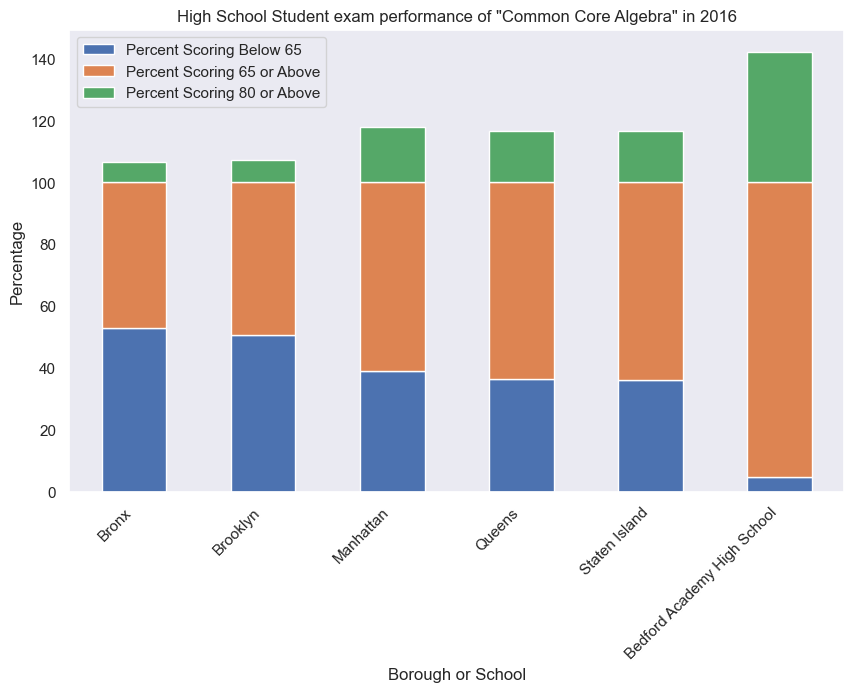

In [54]:
# set the background:
sns.set(style='dark')

#reset index
comparison.set_index('Borough or School').plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the x-axis label to 'Borough or School'
plt.xlabel('Borough or School')
plt.xticks(rotation=45, ha='right')

# Set the y-axis label to 'Percentage'
plt.ylabel('Percentage')

# Set the plot title to 'Percentage Comparison'
plt.title('High School Student exam performance of "Common Core Algebra" in 2016')


<div style="background-color: pink; padding: 10px"><strong>
Based on the bar chart, it is evident that in 2016, Manhattan, Queens, and Staten Island exhibited better high school student performance in "Common Core Algebra." <br><br>
Among these boroughs, Bedford Academy High School stood out with significantly superior student performance, surpassing the average of each borough. <br><br>
The majority of students from Bedford Academy High School passed the exam, with a remarkable pass rate, and the percentage of students who failed the exam remained below 5%, highlighting the school's exceptional academic achievement.

</div>


<h2>Compare comparison point school and its borough

In [55]:
brooklyn_school = comparison.iloc[[1,5]]
brooklyn_school

,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above,Borough or School
Brooklyn,50.80,49.21,7.30,Brooklyn
2016,4.79,95.21,42.27,Bedford Academy High School


Text(0.5, 1.0, 'Brooklyn High School Student exam performance of "Common Core Algebra" in 2016')

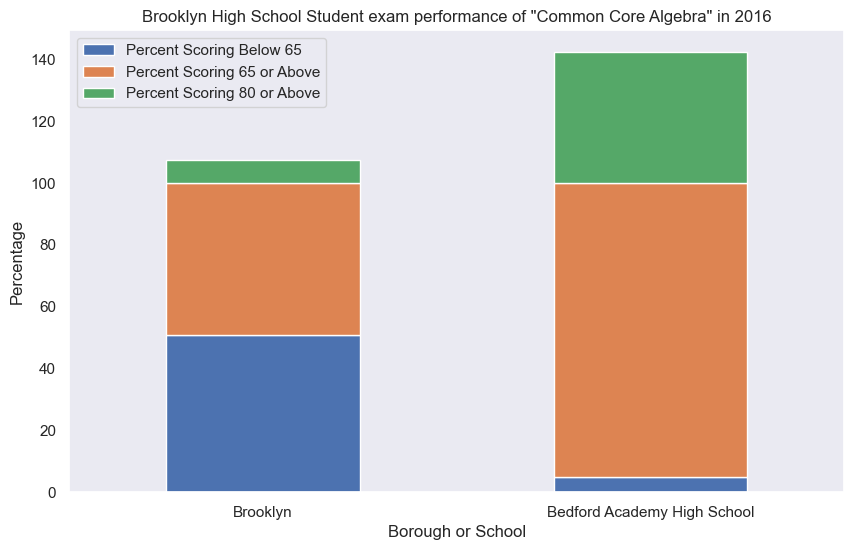

In [56]:
# set the background:
sns.set(style='dark')

#reset index
brooklyn_school.set_index('Borough or School').plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the x-axis label to 'Borough or School'
plt.xlabel('Borough or School')
plt.xticks(rotation=0)

# Set the y-axis label to 'Percentage'
plt.ylabel('Percentage')

# Set the plot title to 'Percentage Comparison'
plt.title('Brooklyn High School Student exam performance of "Common Core Algebra" in 2016')


<div style="background-color: pink; padding: 10px"><strong>
From this we can see, compare to other schools in Brooklyn, students of 'Bedford Academy High School' had better test performance in "Common Core Algebra" in 2016.<br><br>
95.21% students of 'Bedford Academy High School' passed the exam, and 42.27% students got scoring 80 or above. <br>
Comparing to 'Bedford Academy High School', other students in Brooklyn only 49.21% passed the exam, and 7.30% students got scoring 80 or above. 
</div>


<div style="background-color:silver; padding: 10px"><strong>
Note: Handling of 's' in the Dataset

Throughout the dataset, the character 's' is used to denote instances where the number of students represented by a particular score is less than 5. Due to privacy and data confidentiality considerations, scores for such cases have been omitted from the analysis. As a result, the analysis and calculations presented in this report only account for scores where the number of students is 5 or more. It is essential to recognize that the omission of these scores may impact certain statistical metrics and distributions.

</div>

<H1>Summary

<div style="background-color: pink; padding: 10px"><strong>
For regent exam of "Common Core Algebra" in 2016','Bedford Academy High School' had much more percetage students passed the exam than average of other schools.<br>
Overall, Staten Island and Queens had better student performance than Bronx and Brooklyn.<br>
</div>